<center><h1>Jaggi_Yashh_HW7</h1></center>

Name: Yashh Jaggi
<br>
Github Username: yashhjaggi1998
<br>
USC ID: 4591043656

###### NOTE

I want to use 2 late days for this homework submission

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

#### NOTE

Kindly downgrade scikit learn to 1.2.2 for SMOTE to run

pip install scikit-learn==1.2.2

In [1]:
import pandas as pd
import numpy as np
import random
import warnings
import random

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")

### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
path = '../data/Frogs_MFCCs.csv'

In [3]:
df = pd.read_csv(path)
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [4]:
N = df.shape[0]
random.seed(N)

train_indx = random.sample(range(N), int(N * 0.7))

test_indx = []
for indx in range(N):
    if indx not in train_indx:
        test_indx.append(indx)

In [5]:
# split train and test
train = df.iloc[train_indx, :].reset_index(drop=True)
test = df.iloc[test_indx, :].reset_index(drop=True)

train_X = train.iloc[:,:-4]
train_Family = train['Family']
train_Genus = train['Genus']
train_Species = train['Species']

test_X = test.iloc[:,:-4]
test_Family = test['Family']
test_Genus = test['Genus']
test_Species = test['Species']

In [6]:
train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.377944,0.429383,0.601528,0.099087,0.000388,-0.062059,0.113173,0.358851,0.034239,...,0.165731,-0.065993,-0.095989,-0.056341,0.082675,0.169519,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,19
1,1.0,0.632191,0.687750,0.402632,-0.007152,0.116553,-0.005369,0.166537,0.178722,-0.284436,...,-0.114398,0.016819,0.054743,0.096869,0.011300,-0.227317,Hylidae,Hypsiboas,HypsiboasCinerascens,36
2,1.0,0.553265,0.434453,0.169304,-0.001479,0.190652,0.065757,-0.078337,0.093723,0.083821,...,-0.011292,-0.024166,0.014483,-0.032372,-0.010227,0.053640,Hylidae,Hypsiboas,HypsiboasCordobae,42
3,1.0,0.312874,-0.141600,0.306529,0.464158,0.191441,-0.212280,-0.151945,0.159110,0.192428,...,-0.180885,-0.007287,0.081684,0.041302,-0.064581,-0.047451,Dendrobatidae,Ameerega,Ameeregatrivittata,11
4,1.0,0.412758,0.284958,0.590299,0.182816,-0.020608,-0.097203,0.132835,0.295032,0.001360,...,0.158127,-0.003775,-0.084528,-0.172696,-0.004612,0.226103,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5031,1.0,0.687587,0.344193,0.525968,0.152937,0.036198,-0.063721,0.046665,0.157946,-0.041937,...,0.163504,0.033788,-0.005774,-0.052323,-0.001127,0.181899,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
5032,1.0,0.114143,0.137175,0.527703,0.266414,0.062074,-0.145242,-0.047732,0.202191,0.035884,...,0.241585,-0.109394,-0.225168,-0.078060,0.177229,0.208323,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,24
5033,1.0,0.076123,0.124052,0.415311,0.058236,-0.047065,-0.114241,0.052518,0.250506,0.062218,...,0.142359,0.031473,-0.001897,-0.093859,0.035332,0.102104,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,18
5034,1.0,0.533323,0.276118,0.469194,0.155438,0.098326,-0.024866,0.083622,0.288264,0.071312,...,0.159577,0.062651,-0.035049,-0.108595,0.011458,0.222751,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22


In [7]:
test

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,...,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,1.0,-0.512599,-0.171956,0.325813,0.169600,0.421567,-0.123749,-0.298284,0.089382,0.243902,...,0.021225,0.157321,0.042847,0.006852,0.005439,-0.013693,Hylidae,Scinax,ScinaxRuber,60
2155,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
2156,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
2157,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60


### (b) Train a classifier for each label

#### (i) Research

###### EXACT MATCH RATIO
One trivial way around would be just to ignore partially correct (consider them incorrect) and extend the accuracy used in single label case for multi-label prediction. This means if all labels are correctly predicted only then the prediction is accurate. This metric is called exact match ratio.


###### HAMMING LOSS
It reports how many times on average, the relevance of an example to a class label is incorrectly predicted. Therefore, hamming loss takes into account the prediction error (an incorrect label is predicted) and missing error (a relevant label not predicted), normalized over total number of classes and total number of examples.

#### (ii) Train a SVM for each of the labels

In [8]:
def results(clf, test_X, test_Y):
    print("The best parameter values: " + str(clf.best_params_))

    print("\n\nPrediction Metrics: ")
    y_pred = clf.predict(test_X)
    print(classification_report(test_Y, y_pred))

    print("Scores for different parameter options")
    mean_score = clf.cv_results_['mean_test_score']
    std_score = clf.cv_results_['std_test_score']
    params = clf.cv_results_['params']
    for i in range(len(params)):
        print("Score = " + str(round(mean_score[i], 2)) + " for " + str(params[i]))


In [9]:
#common for each label
tuning_params = {'C' : np.logspace(1, 4, 4), 'gamma' : np.logspace(-3, 6, 10)}
cv = StratifiedKFold(10, random_state=5036, shuffle=True)
classifier = SVC(kernel='rbf')

#### RAW ATTRIBUTES

Class = Family

In [10]:
#change train_Family
family_clf = GridSearchCV(estimator=classifier, param_grid=tuning_params, cv=cv, verbose=1)
family_clf.fit(train_X, train_Family)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([   10.,   100.,  1000., 10000.]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06])},
             verbose=1)

In [11]:
results(family_clf, test_X, test_Family)

The best parameter values: {'C': 100.0, 'gamma': 1.0}


Prediction Metrics: 
                 precision    recall  f1-score   support

      Bufonidae       0.93      0.93      0.93        15
  Dendrobatidae       0.99      0.99      0.99       154
        Hylidae       0.99      0.98      0.99       673
Leptodactylidae       0.99      1.00      0.99      1317

       accuracy                           0.99      2159
      macro avg       0.98      0.98      0.98      2159
   weighted avg       0.99      0.99      0.99      2159

Scores for different parameter options
Score = 0.87 for {'C': 10.0, 'gamma': 0.001}
Score = 0.93 for {'C': 10.0, 'gamma': 0.01}
Score = 0.97 for {'C': 10.0, 'gamma': 0.1}
Score = 0.99 for {'C': 10.0, 'gamma': 1.0}
Score = 0.99 for {'C': 10.0, 'gamma': 10.0}
Score = 0.81 for {'C': 10.0, 'gamma': 100.0}
Score = 0.63 for {'C': 10.0, 'gamma': 1000.0}
Score = 0.62 for {'C': 10.0, 'gamma': 10000.0}
Score = 0.62 for {'C': 10.0, 'gamma': 100000.0}
Score = 0.62 for {'C

Class = Genus

In [12]:
#change train_Genus
genus_clf = GridSearchCV(estimator=classifier, param_grid=tuning_params, cv=cv, verbose=1)
genus_clf.fit(train_X, train_Genus)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([   10.,   100.,  1000., 10000.]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06])},
             verbose=1)

In [13]:
results(genus_clf, test_X, test_Genus)

The best parameter values: {'C': 100.0, 'gamma': 1.0}


Prediction Metrics: 
               precision    recall  f1-score   support

    Adenomera       0.99      1.00      1.00      1240
     Ameerega       0.99      0.99      0.99       154
Dendropsophus       0.97      0.95      0.96        91
    Hypsiboas       0.99      0.99      0.99       479
Leptodactylus       0.95      1.00      0.97        77
Osteocephalus       1.00      0.87      0.93        47
     Rhinella       1.00      0.93      0.97        15
       Scinax       1.00      0.98      0.99        56

     accuracy                           0.99      2159
    macro avg       0.99      0.96      0.97      2159
 weighted avg       0.99      0.99      0.99      2159

Scores for different parameter options
Score = 0.81 for {'C': 10.0, 'gamma': 0.001}
Score = 0.93 for {'C': 10.0, 'gamma': 0.01}
Score = 0.97 for {'C': 10.0, 'gamma': 0.1}
Score = 0.99 for {'C': 10.0, 'gamma': 1.0}
Score = 0.98 for {'C': 10.0, 'gamma': 10.0}
Sc

Class = Species

In [14]:
#change train_Species
species_clf = GridSearchCV(estimator=classifier, param_grid=tuning_params, cv=cv, verbose=1)
species_clf.fit(train_X, train_Species)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([   10.,   100.,  1000., 10000.]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06])},
             verbose=1)

In [15]:
results(species_clf, test_X, test_Species)

The best parameter values: {'C': 100.0, 'gamma': 1.0}


Prediction Metrics: 
                        precision    recall  f1-score   support

        AdenomeraAndre       0.99      0.98      0.99       182
AdenomeraHylaedactylus       0.99      1.00      1.00      1058
    Ameeregatrivittata       0.98      0.99      0.99       154
            HylaMinuta       0.97      0.95      0.96        91
  HypsiboasCinerascens       0.98      0.99      0.99       153
     HypsiboasCordobae       0.99      0.98      0.99       326
   LeptodactylusFuscus       0.97      1.00      0.99        77
 OsteocephalusOophagus       0.98      0.89      0.93        47
     Rhinellagranulosa       1.00      0.93      0.97        15
           ScinaxRuber       1.00      0.98      0.99        56

              accuracy                           0.99      2159
             macro avg       0.99      0.97      0.98      2159
          weighted avg       0.99      0.99      0.99      2159

Scores for different par

#### STANDARDIZED ATTRIBUTES:

In [16]:
scaler = StandardScaler()

std_train_X = scaler.fit_transform(train_X)
std_test_X = scaler.fit_transform(test_X)

Class = Family

In [17]:
#change train_Family
std_family_clf = GridSearchCV(estimator=classifier, param_grid=tuning_params, cv=cv, verbose=1)
std_family_clf.fit(std_train_X, train_Family)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([   10.,   100.,  1000., 10000.]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06])},
             verbose=1)

In [18]:
results(std_family_clf, std_test_X, test_Family)

The best parameter values: {'C': 10.0, 'gamma': 0.1}


Prediction Metrics: 
                 precision    recall  f1-score   support

      Bufonidae       1.00      0.93      0.97        15
  Dendrobatidae       1.00      1.00      1.00       154
        Hylidae       0.98      1.00      0.99       673
Leptodactylidae       1.00      0.99      0.99      1317

       accuracy                           0.99      2159
      macro avg       1.00      0.98      0.99      2159
   weighted avg       0.99      0.99      0.99      2159

Scores for different parameter options
Score = 0.95 for {'C': 10.0, 'gamma': 0.001}
Score = 0.99 for {'C': 10.0, 'gamma': 0.01}
Score = 0.99 for {'C': 10.0, 'gamma': 0.1}
Score = 0.91 for {'C': 10.0, 'gamma': 1.0}
Score = 0.67 for {'C': 10.0, 'gamma': 10.0}
Score = 0.62 for {'C': 10.0, 'gamma': 100.0}
Score = 0.62 for {'C': 10.0, 'gamma': 1000.0}
Score = 0.62 for {'C': 10.0, 'gamma': 10000.0}
Score = 0.62 for {'C': 10.0, 'gamma': 100000.0}
Score = 0.62 for {'C'

Class = Genus

In [19]:
#change train_Genus
std_genus_clf = GridSearchCV(estimator=classifier, param_grid=tuning_params, cv=cv, verbose=1)
std_genus_clf.fit(std_train_X, train_Genus)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([   10.,   100.,  1000., 10000.]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06])},
             verbose=1)

In [20]:
results(std_genus_clf, std_test_X, test_Genus)

The best parameter values: {'C': 100.0, 'gamma': 0.01}


Prediction Metrics: 
               precision    recall  f1-score   support

    Adenomera       0.99      1.00      0.99      1240
     Ameerega       0.99      0.99      0.99       154
Dendropsophus       0.96      0.95      0.95        91
    Hypsiboas       0.98      0.98      0.98       479
Leptodactylus       0.96      0.99      0.97        77
Osteocephalus       1.00      0.85      0.92        47
     Rhinella       0.88      1.00      0.94        15
       Scinax       1.00      0.96      0.98        56

     accuracy                           0.99      2159
    macro avg       0.97      0.96      0.97      2159
 weighted avg       0.99      0.99      0.99      2159

Scores for different parameter options
Score = 0.96 for {'C': 10.0, 'gamma': 0.001}
Score = 0.99 for {'C': 10.0, 'gamma': 0.01}
Score = 0.99 for {'C': 10.0, 'gamma': 0.1}
Score = 0.87 for {'C': 10.0, 'gamma': 1.0}
Score = 0.63 for {'C': 10.0, 'gamma': 10.0}
S

Class = Species

In [21]:
#change train_Family
std_species_clf = GridSearchCV(estimator=classifier, param_grid=tuning_params, cv=cv, verbose=1)
std_species_clf.fit(std_train_X, train_Species)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=SVC(),
             param_grid={'C': array([   10.,   100.,  1000., 10000.]),
                         'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06])},
             verbose=1)

In [22]:
results(std_species_clf, std_test_X, test_Species)

The best parameter values: {'C': 100.0, 'gamma': 0.01}


Prediction Metrics: 
                        precision    recall  f1-score   support

        AdenomeraAndre       0.98      0.98      0.98       182
AdenomeraHylaedactylus       0.99      1.00      1.00      1058
    Ameeregatrivittata       0.99      0.99      0.99       154
            HylaMinuta       0.94      0.93      0.94        91
  HypsiboasCinerascens       0.97      0.99      0.98       153
     HypsiboasCordobae       0.99      0.98      0.99       326
   LeptodactylusFuscus       0.97      0.99      0.98        77
 OsteocephalusOophagus       0.95      0.89      0.92        47
     Rhinellagranulosa       0.88      1.00      0.94        15
           ScinaxRuber       1.00      0.98      0.99        56

              accuracy                           0.99      2159
             macro avg       0.97      0.97      0.97      2159
          weighted avg       0.99      0.99      0.99      2159

Scores for different pa

#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [23]:
#common for each label
l1_tuning_params = {'C' : np.logspace(1, 5, 10)}
l1_classifier = LinearSVC(penalty = 'l1', dual = False)

Class = Family

In [24]:
#change train_Family
l1_family_clf = GridSearchCV(estimator = l1_classifier, param_grid = l1_tuning_params, cv = cv, verbose = 1)
l1_family_clf.fit(std_train_X, train_Family)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=LinearSVC(dual=False, penalty='l1'),
             param_grid={'C': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])},
             verbose=1)

In [25]:
results(l1_family_clf, std_test_X, test_Family)

The best parameter values: {'C': 10.0}


Prediction Metrics: 
                 precision    recall  f1-score   support

      Bufonidae       0.00      0.00      0.00        15
  Dendrobatidae       0.88      0.92      0.90       154
        Hylidae       0.94      0.90      0.92       673
Leptodactylidae       0.95      0.98      0.96      1317

       accuracy                           0.94      2159
      macro avg       0.69      0.70      0.70      2159
   weighted avg       0.94      0.94      0.94      2159

Scores for different parameter options
Score = 0.93 for {'C': 10.0}
Score = 0.93 for {'C': 27.825594022071243}
Score = 0.93 for {'C': 77.4263682681127}
Score = 0.93 for {'C': 215.44346900318823}
Score = 0.93 for {'C': 599.4842503189409}
Score = 0.93 for {'C': 1668.100537200059}
Score = 0.93 for {'C': 4641.588833612777}
Score = 0.93 for {'C': 12915.496650148827}
Score = 0.93 for {'C': 35938.13663804626}
Score = 0.93 for {'C': 100000.0}


Class = Genus

In [26]:
#change train_Family
l1_genus_clf = GridSearchCV(estimator = l1_classifier, param_grid = l1_tuning_params, cv = cv, verbose = 1)
l1_genus_clf.fit(std_train_X, train_Genus)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=LinearSVC(dual=False, penalty='l1'),
             param_grid={'C': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])},
             verbose=1)

In [27]:
results(l1_genus_clf, std_test_X, test_Genus)

The best parameter values: {'C': 10.0}


Prediction Metrics: 
               precision    recall  f1-score   support

    Adenomera       0.96      0.99      0.98      1240
     Ameerega       0.92      0.95      0.94       154
Dendropsophus       0.92      0.67      0.78        91
    Hypsiboas       0.92      0.98      0.95       479
Leptodactylus       0.97      0.90      0.93        77
Osteocephalus       1.00      0.36      0.53        47
     Rhinella       0.91      0.67      0.77        15
       Scinax       0.95      0.93      0.94        56

     accuracy                           0.95      2159
    macro avg       0.95      0.81      0.85      2159
 weighted avg       0.95      0.95      0.95      2159

Scores for different parameter options
Score = 0.95 for {'C': 10.0}
Score = 0.95 for {'C': 27.825594022071243}
Score = 0.95 for {'C': 77.4263682681127}
Score = 0.95 for {'C': 215.44346900318823}
Score = 0.95 for {'C': 599.4842503189409}
Score = 0.95 for {'C': 1668.1005372000

Class = Species

In [28]:
l1_species_clf = GridSearchCV(estimator = l1_classifier, param_grid = l1_tuning_params, cv = cv, verbose = 1)
l1_species_clf.fit(std_train_X, train_Species)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=LinearSVC(dual=False, penalty='l1'),
             param_grid={'C': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])},
             verbose=1)

In [29]:
results(l1_species_clf, std_test_X, test_Species)

The best parameter values: {'C': 599.4842503189409}


Prediction Metrics: 
                        precision    recall  f1-score   support

        AdenomeraAndre       0.88      0.94      0.91       182
AdenomeraHylaedactylus       0.99      1.00      0.99      1058
    Ameeregatrivittata       0.94      0.94      0.94       154
            HylaMinuta       0.92      0.71      0.80        91
  HypsiboasCinerascens       0.92      0.94      0.93       153
     HypsiboasCordobae       0.92      0.96      0.94       326
   LeptodactylusFuscus       0.97      0.91      0.94        77
 OsteocephalusOophagus       1.00      0.49      0.66        47
     Rhinellagranulosa       0.72      0.87      0.79        15
           ScinaxRuber       0.93      0.96      0.95        56

              accuracy                           0.95      2159
             macro avg       0.92      0.87      0.88      2159
          weighted avg       0.95      0.95      0.95      2159

Scores for different param

#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [30]:
smote_tuning_params = {'classification__C' : np.logspace(1, 5, 10)}

smote_classifier = Pipeline([('sampling', SMOTE()), 
                             ('classification', LinearSVC(penalty = 'l1', dual = False) )])

Class = Family

In [31]:
#change train_Family
smote_family_clf = GridSearchCV(estimator = smote_classifier, param_grid = smote_tuning_params, cv = cv, verbose = 1)
smote_family_clf.fit(std_train_X, train_Family)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('classification',
                                        LinearSVC(dual=False, penalty='l1'))]),
             param_grid={'classification__C': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])},
             verbose=1)

In [32]:
results(smote_family_clf, std_test_X, test_Family)

The best parameter values: {'classification__C': 100000.0}


Prediction Metrics: 
                 precision    recall  f1-score   support

      Bufonidae       0.23      0.93      0.37        15
  Dendrobatidae       0.77      0.98      0.86       154
        Hylidae       0.95      0.86      0.91       673
Leptodactylidae       0.96      0.95      0.95      1317

       accuracy                           0.92      2159
      macro avg       0.73      0.93      0.77      2159
   weighted avg       0.94      0.92      0.93      2159

Scores for different parameter options
Score = 0.91 for {'classification__C': 10.0}
Score = 0.91 for {'classification__C': 27.825594022071243}
Score = 0.91 for {'classification__C': 77.4263682681127}
Score = 0.91 for {'classification__C': 215.44346900318823}
Score = 0.91 for {'classification__C': 599.4842503189409}
Score = 0.91 for {'classification__C': 1668.100537200059}
Score = 0.91 for {'classification__C': 4641.588833612777}
Score = 0.92 for {'classif

Class = Genus

In [33]:
#change train_Genus
smote_genus_clf = GridSearchCV(estimator = smote_classifier, param_grid = smote_tuning_params, cv = cv, verbose = 1)
smote_genus_clf.fit(std_train_X, train_Genus)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=5036, shuffle=True),
             estimator=Pipeline(steps=[('sampling', SMOTE()),
                                       ('classification',
                                        LinearSVC(dual=False, penalty='l1'))]),
             param_grid={'classification__C': array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])},
             verbose=1)

In [34]:
results(smote_genus_clf, std_test_X, test_Genus)

The best parameter values: {'classification__C': 100000.0}


Prediction Metrics: 
               precision    recall  f1-score   support

    Adenomera       0.99      0.92      0.95      1240
     Ameerega       0.83      0.92      0.87       154
Dendropsophus       0.65      0.96      0.78        91
    Hypsiboas       0.97      0.90      0.93       479
Leptodactylus       0.91      0.90      0.90        77
Osteocephalus       0.56      0.77      0.65        47
     Rhinella       0.23      0.87      0.37        15
       Scinax       0.87      0.96      0.92        56

     accuracy                           0.91      2159
    macro avg       0.75      0.90      0.80      2159
 weighted avg       0.94      0.91      0.92      2159

Scores for different parameter options
Score = 0.91 for {'classification__C': 10.0}
Score = 0.91 for {'classification__C': 27.825594022071243}
Score = 0.91 for {'classification__C': 77.4263682681127}
Score = 0.91 for {'classification__C': 215.443469003188

Class = Species

In [36]:
results(smote_species_clf, std_test_X, test_Species)

The best parameter values: {'classification__C': 1668.100537200059}


Prediction Metrics: 
                        precision    recall  f1-score   support

        AdenomeraAndre       0.96      0.92      0.94       182
AdenomeraHylaedactylus       0.99      1.00      0.99      1058
    Ameeregatrivittata       0.94      0.89      0.91       154
            HylaMinuta       0.84      0.89      0.86        91
  HypsiboasCinerascens       0.95      0.93      0.94       153
     HypsiboasCordobae       0.95      0.91      0.93       326
   LeptodactylusFuscus       0.91      0.90      0.90        77
 OsteocephalusOophagus       0.80      0.68      0.74        47
     Rhinellagranulosa       0.36      0.93      0.52        15
           ScinaxRuber       0.89      0.96      0.92        56

              accuracy                           0.95      2159
             macro avg       0.86      0.90      0.87      2159
          weighted avg       0.96      0.95      0.95      2159

Scores for

## Results

In [37]:
test_Y = pd.concat([test_Family, test_Genus, test_Species], axis = 1)
test_Y

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
2154,Hylidae,Scinax,ScinaxRuber
2155,Hylidae,Scinax,ScinaxRuber
2156,Hylidae,Scinax,ScinaxRuber
2157,Hylidae,Scinax,ScinaxRuber


In [38]:
def get_y_pred(family_clf, genus_clf, species_clf, test_X, test_Y):
    y_family_pred = pd.DataFrame(family_clf.predict(test_X))
    y_genus_pred = pd.DataFrame(genus_clf.predict(test_X))
    y_species_pred = pd.DataFrame(species_clf.predict(test_X))

    y_pred_test_raw = pd.concat([y_family_pred, y_genus_pred, y_species_pred], axis = 1)
    y_pred_test_raw.columns = test_Y.columns

    return y_pred_test_raw

In [39]:
def hamming_exactratio_eval(test_Y, y_pred_test):

    N_misclassified_lables = 0
    N_exact_matches = 0
    n_lables = 3
    for i in range(test_Y.shape[0]):
        true = test_Y.loc[i].values
        pred = y_pred_test.loc[i].values

        misses = (true != pred)
        match = (true == pred)

        N_misclassified_lables += np.sum(misses)
        if sum(match) == n_lables:
            N_exact_matches += 1

    hamming_loss = round(N_misclassified_lables/(n_lables * test_Y.shape[0]), 4)
    exact_ratio = round(N_exact_matches/test_Y.shape[0], 4)

    print("Hamming Loss = " + str(hamming_loss))
    print("Exact Match Ratio = " + str(exact_ratio))

#### RAW ATTRIBUTRES

In [40]:
y_pred_test_raw = get_y_pred(family_clf, genus_clf, species_clf, test_X, test_Y)

hamming_exactratio_eval(test_Y, y_pred_test_raw)

Hamming Loss = 0.0096
Exact Match Ratio = 0.9852


#### STANDARDIZED ATTRIBUTRES

In [41]:
y_pred_test_std = get_y_pred(std_family_clf, std_genus_clf, std_species_clf, std_test_X, test_Y)

hamming_exactratio_eval(test_Y, y_pred_test_std)

Hamming Loss = 0.0116
Exact Match Ratio = 0.9792


Raw attributes predict slightly better on test data when compared to standardized attributes.

#### L1 ATTRIBUTRES

In [42]:
y_pred_test_l1 = get_y_pred(l1_family_clf, l1_genus_clf, l1_species_clf, std_test_X, test_Y)

hamming_exactratio_eval(test_Y, y_pred_test_l1)

Hamming Loss = 0.052
Exact Match Ratio = 0.9143


#### Results - SMOTE ATTRIBUTRES

In [43]:
y_pred_test_smote = get_y_pred(smote_family_clf, smote_genus_clf, smote_species_clf, std_test_X, test_Y)

hamming_exactratio_eval(test_Y, y_pred_test_smote)

Hamming Loss = 0.0719
Exact Match Ratio = 0.8592


Out of all the classifiers, SVM trained with class imbalance, no l1 regularization and raw attributes performs the best.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

In [44]:
X = df.iloc[:,0:-4]
Y = df.iloc[:,-4:-1]

print(X.shape)
print(Y.shape)

(7195, 22)
(7195, 3)


In [45]:
result = {'Iteration': [], 'Optimal K': [], 
          'Hamming Distance': [], 'Hamming Score': [], 'Hamming Loss': [], 
          'Majority Triplets(Family, Genus, Species)': []}

for iteration in range(1, 51):
    
    optK = 2
    max_score = 0
    result['Iteration'].append(iteration)
    print(iteration)
    
    #Get optimal k for each iteration
    for k in range(2, 51):

        rand_val = random.randint(1, 50)
        k_means = KMeans(n_clusters = k, random_state = rand_val).fit(X)

        s_score = silhouette_score(X, k_means.labels_)
        #print(s_score)
        if s_score > max_score:
            max_score = s_score
            optK = k
            
    
    result['Optimal K'].append(optK)
    #print("Iteration " + str(iteration) + ": optimal-k " + str(optK))
    
    # get majority lables for optimal k
    rand_val = random.randint(1, 50)
    k_means = KMeans(n_clusters = optK, random_state = rand_val).fit(X)

    cluster_labels = k_means.labels_
    clustered_df = pd.concat([X, Y, pd.DataFrame({'labels' : cluster_labels.tolist()})], axis = 1)

    majority_classes_every_cluster = []
    majority_triplet_str = ""
    for c_i in range(optK):
        #for each cluster
        cluster_rows = clustered_df[clustered_df['labels'] == c_i]

        family_label_majority_class = cluster_rows['Family'].value_counts().index[0]
        genus_label_majority_class = cluster_rows['Genus'].value_counts().index[0]
        species_label_majority_class = cluster_rows['Species'].value_counts().index[0]

        majority_classes_every_cluster.append([family_label_majority_class, genus_label_majority_class, species_label_majority_class])

        #print("Cluster " + str(c_i) + ": (" + family_label_majority_class + ", " + genus_label_majority_class + ", " + species_label_majority_class + ")")
        majority_triplet_str += "Cluster " + str(c_i) + ": (" + family_label_majority_class + ", " + genus_label_majority_class + ", " + species_label_majority_class + ")\n"
        
    
    result['Majority Triplets(Family, Genus, Species)'].append(majority_triplet_str)
        
        
    #Average Hamming
    N_misses = 0
    for c_i in range(optK):
        true_labels = clustered_df[clustered_df['labels'] == c_i].iloc[:,-4:-1]
        for row in true_labels.values:
            #print(row)
            miss = (row != majority_classes_every_cluster[c_i])
            N_misses += np.sum(miss)  

    hamming_dist = round(N_misses / clustered_df.shape[0], 4)
    hamming_loss = round(N_misses / (3 * clustered_df.shape[0]), 4)
    hamming_score = round(1 - hamming_loss, 4)

    #print("Hamming Distance: " + str(hamming_dist) + ", Hamming Score: " 
    #        + str(hamming_score) + ", Hamming Loss: " + str(hamming_loss))
    
    result['Hamming Distance'].append(hamming_dist)
    result['Hamming Score'].append(hamming_score)
    result['Hamming Loss'].append(hamming_loss)
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


### (b) Determine which family is the majority

In [47]:
pd.DataFrame(result)

,Iteration,Optimal K,Hamming Distance,Hamming Score,Hamming Loss,"Majority Triplets(Family, Genus, Species)"
0,1,4,0.6673,0.7776,0.2224,"Cluster 0: (Hylidae, Hypsiboas, HypsiboasCordo..."
1,2,4,0.6673,0.7776,0.2224,"Cluster 0: (Leptodactylidae, Adenomera, Adenom..."
2,3,4,0.6673,0.7776,0.2224,"Cluster 0: (Dendrobatidae, Ameerega, Ameeregat..."
3,4,4,0.6673,0.7776,0.2224,"Cluster 0: (Hylidae, Hypsiboas, HypsiboasCiner..."
4,5,4,0.6673,0.7776,0.2224,"Cluster 0: (Dendrobatidae, Ameerega, Ameeregat..."
5,6,4,0.6673,0.7776,0.2224,"Cluster 0: (Leptodactylidae, Adenomera, Adenom..."
6,7,4,0.6673,0.7776,0.2224,"Cluster 0: (Dendrobatidae, Ameerega, Ameeregat..."
7,8,4,0.6664,0.7779,0.2221,"Cluster 0: (Leptodactylidae, Adenomera, Adenom..."
8,9,4,0.6673,0.7776,0.2224,"Cluster 0: (Hylidae, Hypsiboas, HypsiboasCiner..."
9,10,4,0.6673,0.7776,0.2224,"Cluster 0: (Hylidae, Hypsiboas, HypsiboasCordo..."


### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [48]:
iter_result = pd.DataFrame(result)
mean_data = iter_result.describe().loc['mean']
std_data = iter_result.describe().loc['std']

print("Average Hamming Distance: " + str(round(mean_data['Hamming Distance'], 4)))
print("Average Hamming Score: " + str(round(mean_data['Hamming Score'], 4)))
print("Average Hamming Loss: " + str(round(mean_data['Hamming Loss'], 4)))

print("Standard deviation of Hamming Distance: " + str(round(std_data['Hamming Distance'], 4)))
print("Standard deviation of Hamming Score: " + str(round(std_data['Hamming Score'], 4)))
print("Standard deviation of Hamming Loss: " + str(round(std_data['Hamming Loss'], 4)))

Average Hamming Distance: 0.6699
Average Hamming Score: 0.7767
Average Hamming Loss: 0.2233
Standard deviation of Hamming Distance: 0.0136
Standard deviation of Hamming Score: 0.0045
Standard deviation of Hamming Loss: 0.0045


## 3. ISLR 12.6.2

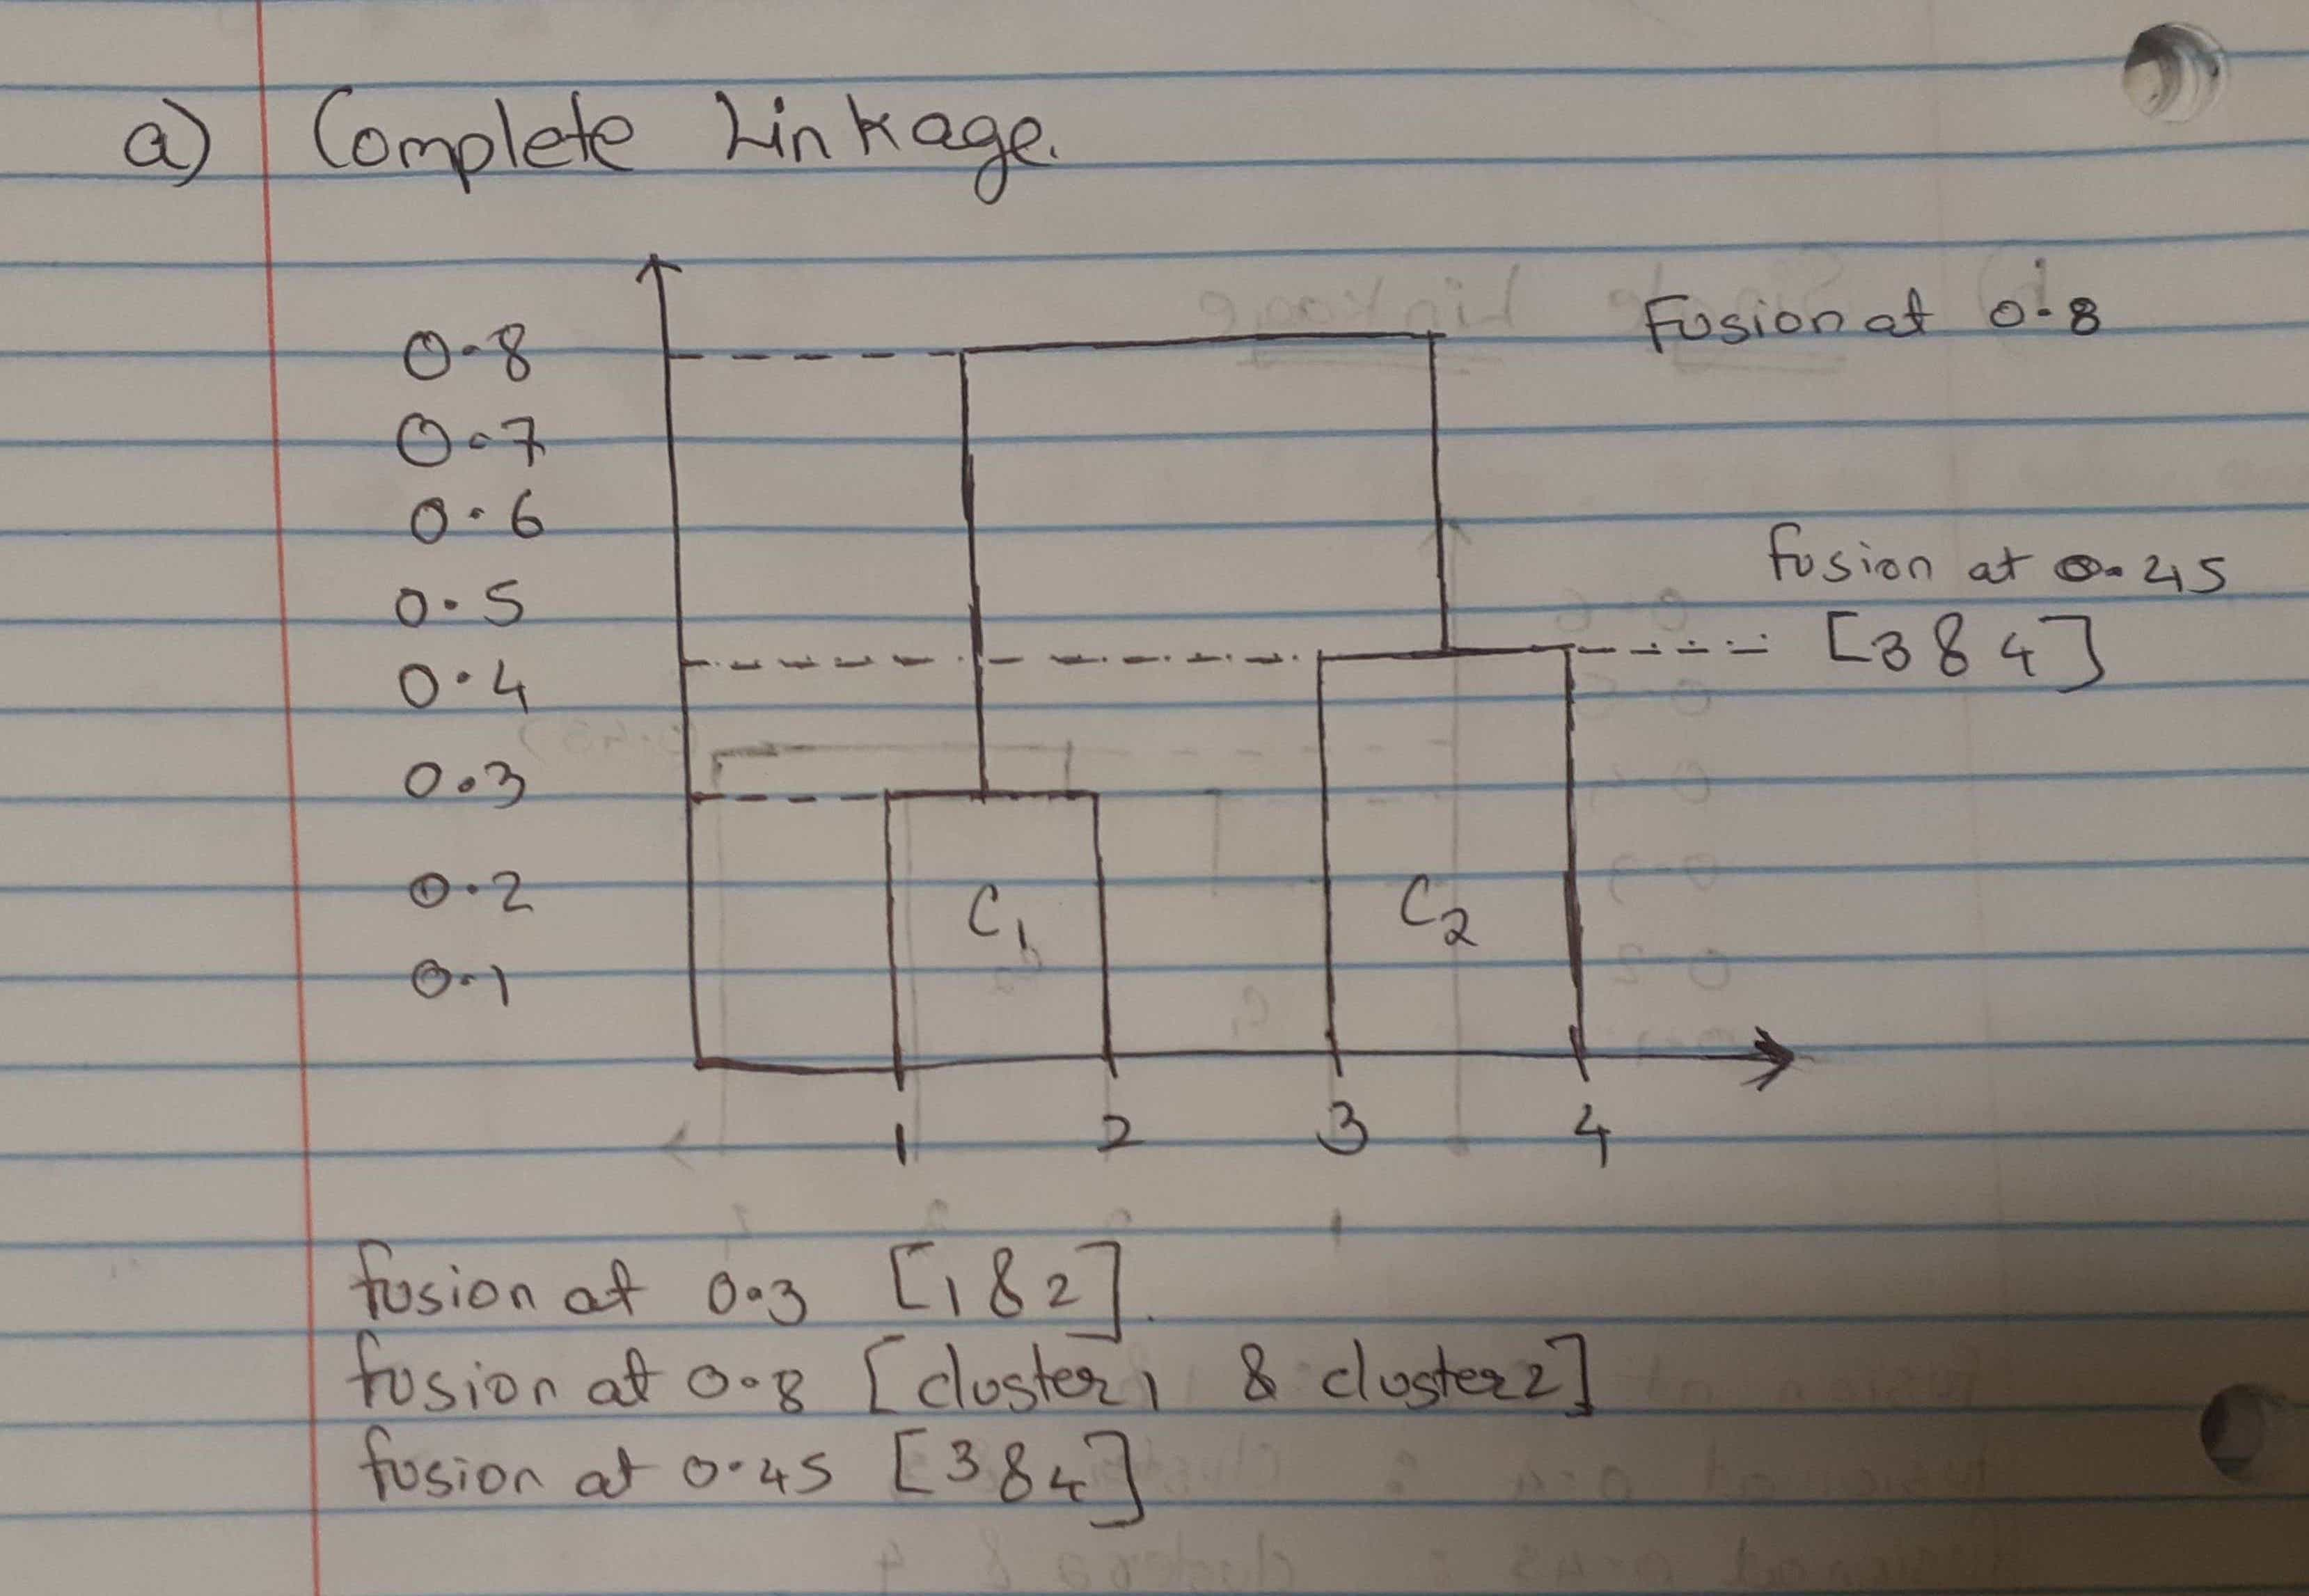

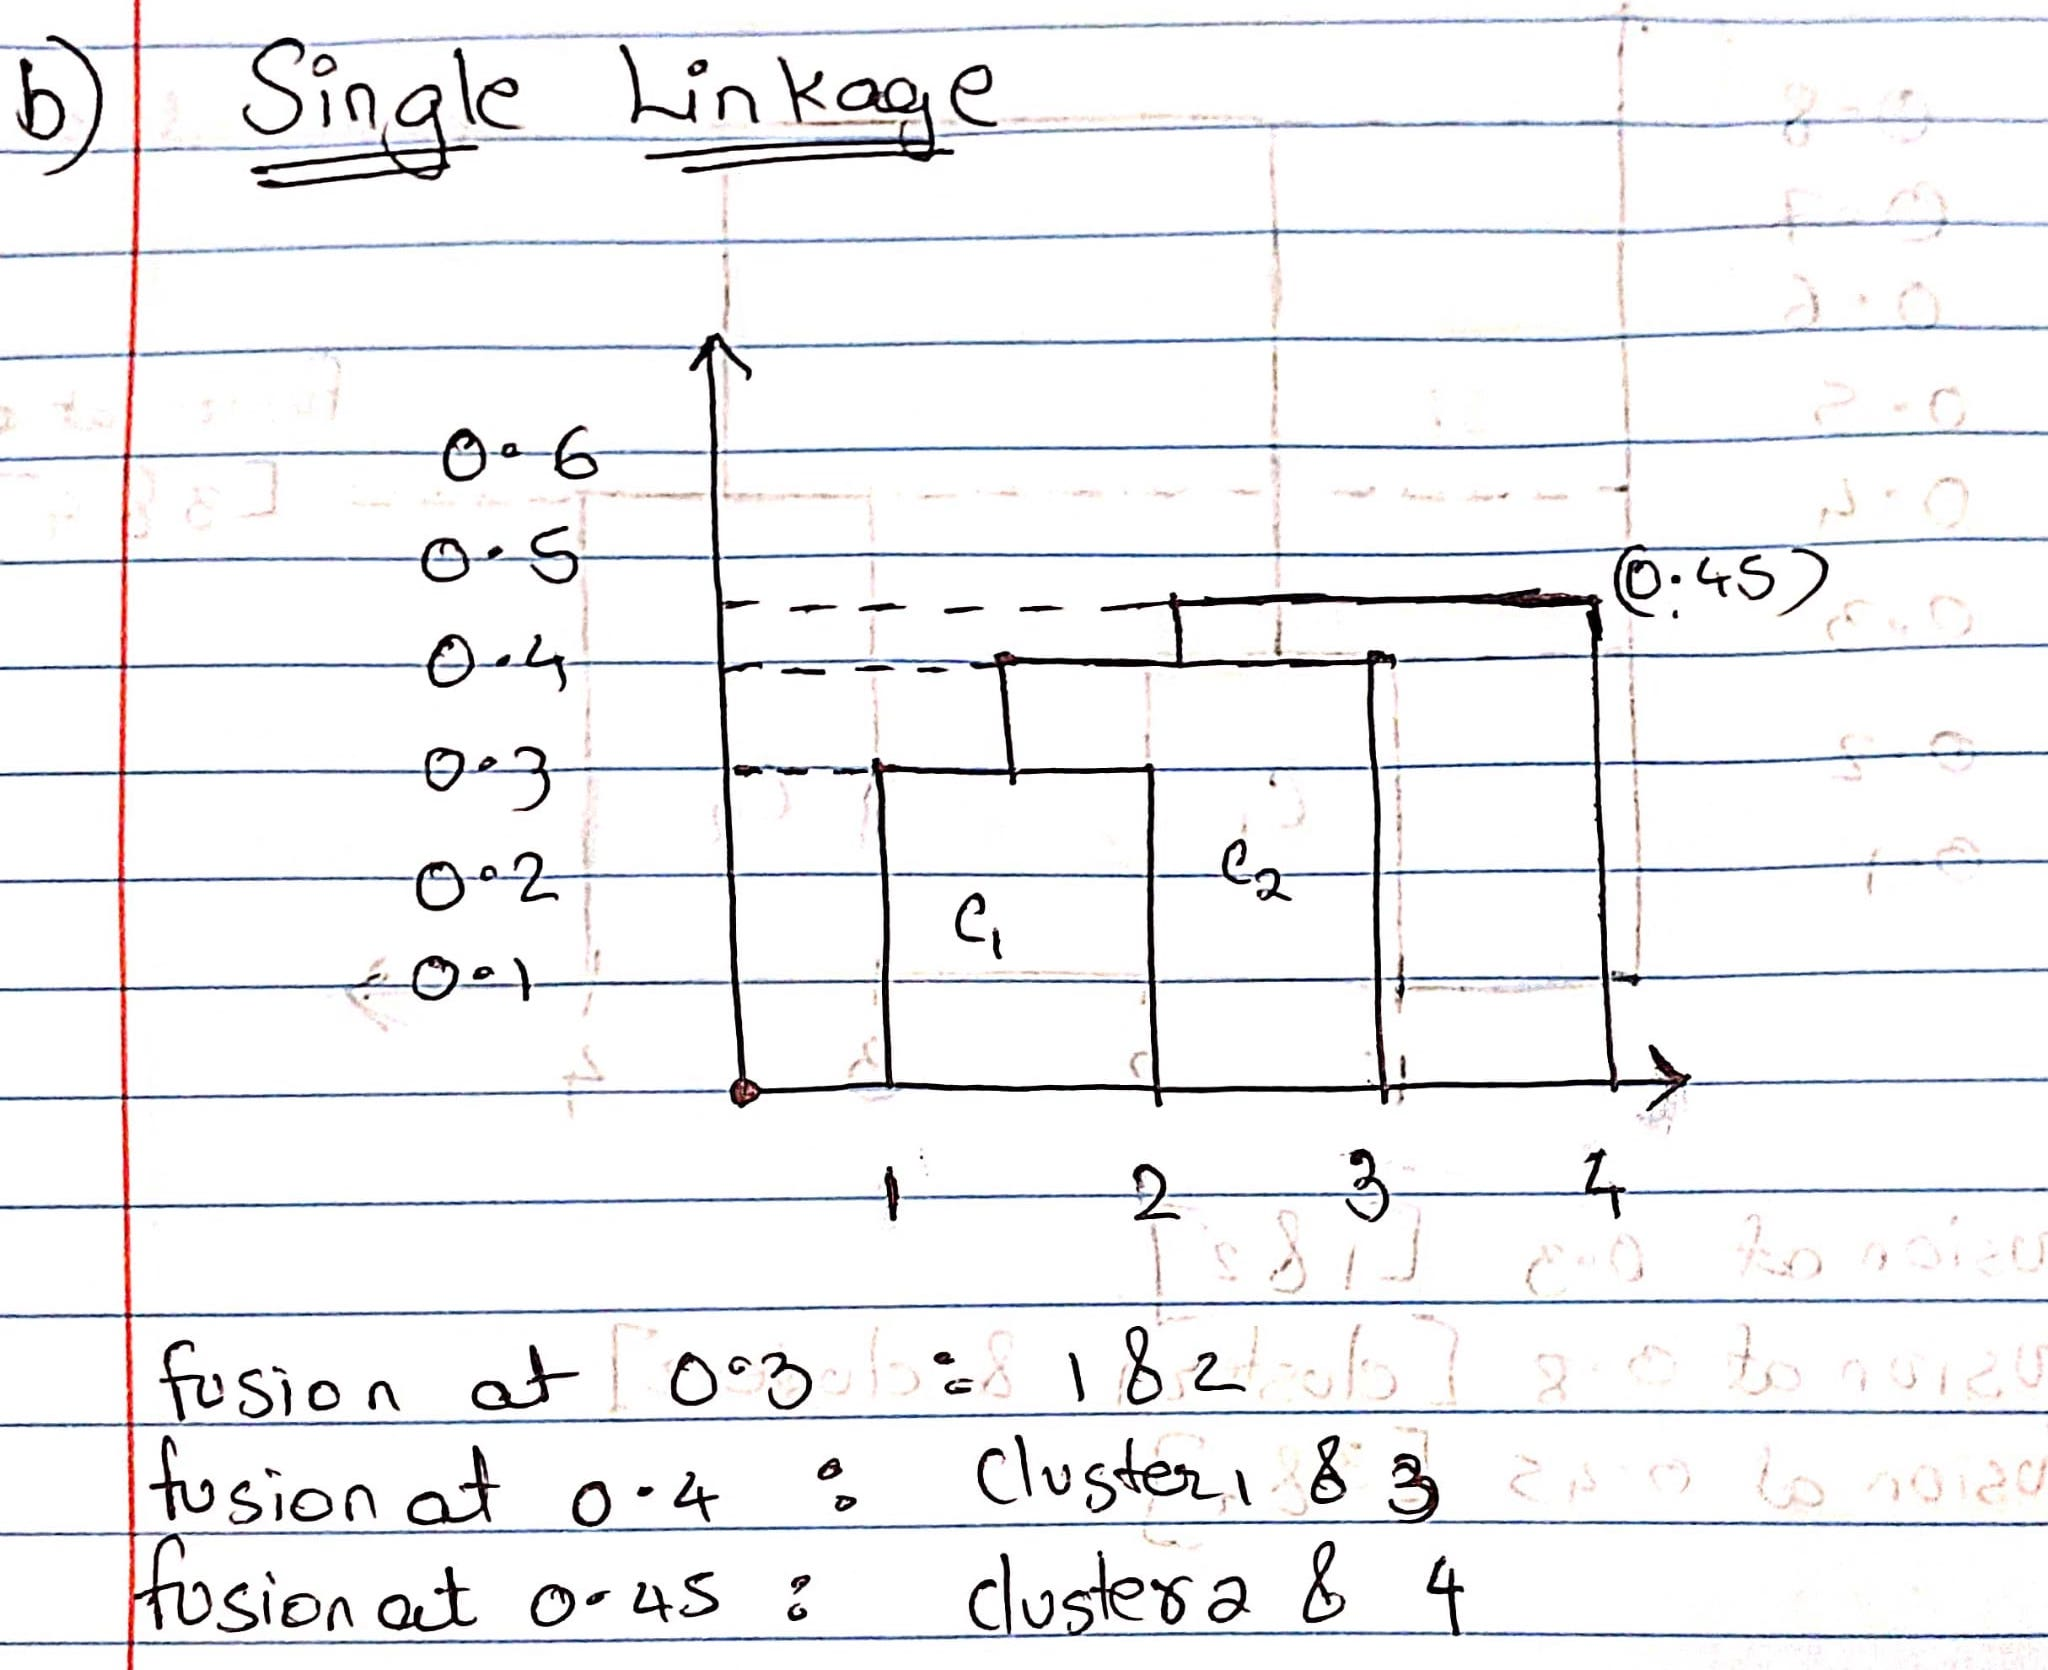

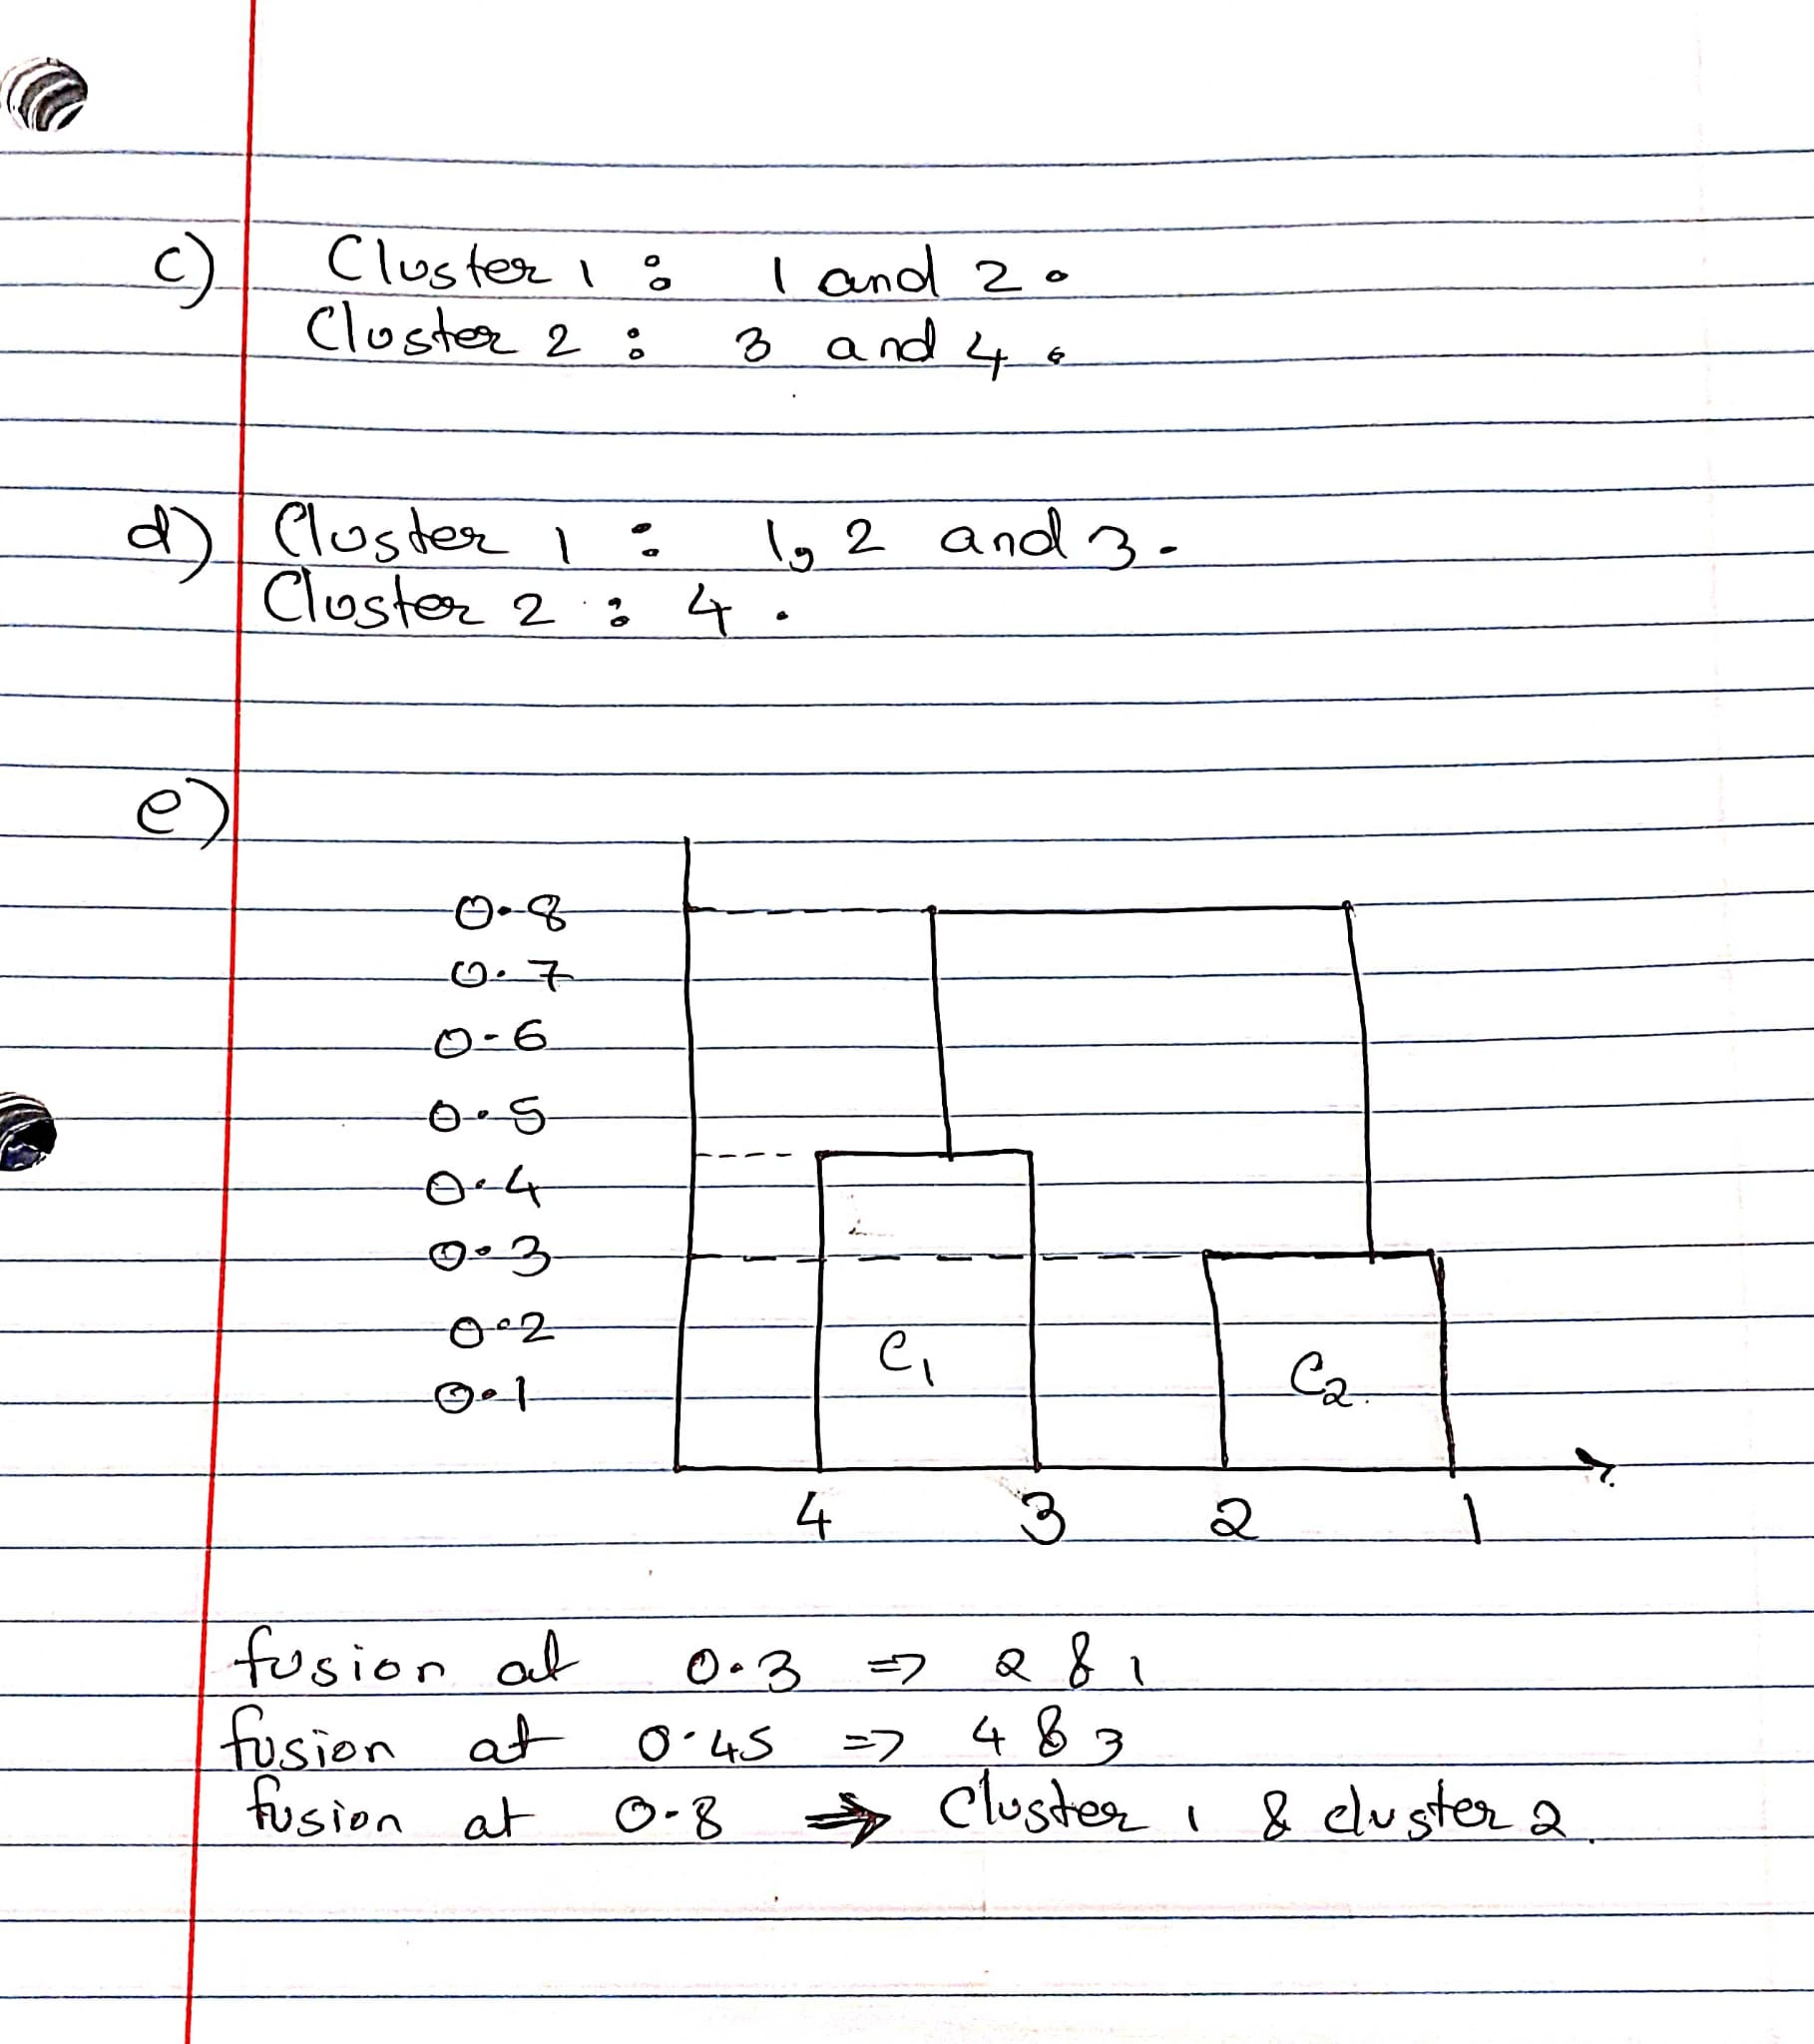